In [2]:
import pandas as pd
import matplotlib.pyplot as plt



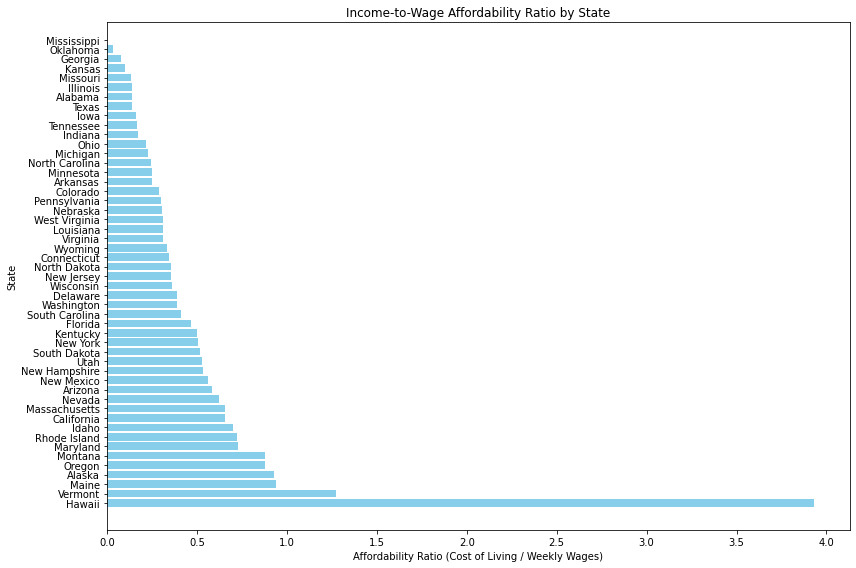

In [16]:
wages = "State_Mean_Weekly_Wages.xlsx"
living = "LivingIndex.xlsx"

living_index = pd.read_excel(living, sheet_name="Sheet1")
state_mean_wages = pd.read_excel(wages, sheet_name="State_Mean_Weekly_Wages")

clean_living_data = living_index.dropna(subset=["Cost_of_Living"])

min_value = clean_living_data["Cost_of_Living"].min()
max_value = clean_living_data["Cost_of_Living"].max()
clean_living_data["Normalized_Cost_of_Living"] = (
    (clean_living_data["Cost_of_Living"] - min_value) / (max_value - min_value)
)

income_wages_data = clean_living_data.merge(state_mean_wages, how="inner", on="State")

min_wages = income_wages_data["Mean_Weekly_Wages"].min()
max_wages = income_wages_data["Mean_Weekly_Wages"].max()
income_wages_data["Normalized_Weekly_Wages"] = (
    (income_wages_data["Mean_Weekly_Wages"] - min_wages) / (max_wages - min_wages)
)

income_wages_data["Affordability_Ratio"] = (
    income_wages_data["Normalized_Cost_of_Living"] / income_wages_data["Normalized_Weekly_Wages"]
)

income_wages_data_sorted = income_wages_data.sort_values(by="Affordability_Ratio", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(
    income_wages_data_sorted["State"],
    income_wages_data_sorted["Affordability_Ratio"],
    color="skyblue"
)
plt.xlabel("Affordability Ratio (Cost of Living / Weekly Wages)")
plt.ylabel("State")
plt.title("Income-to-Wage Affordability Ratio by State")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://scikit-learn.org/1.5/modules/clustering.html
https://realpython.com/k-means-clustering-python/
https://stackoverflow.com/questions/65991074/how-to-find-most-optimal-number-of-clusters-with-k-means-clustering-in-python

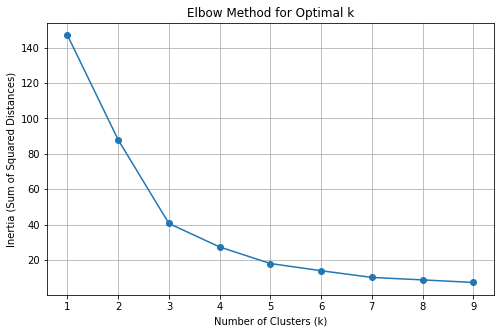

In [10]:
wages = "State_Mean_Weekly_Wages.xlsx"
living = "LivingIndex.xlsx"

living_index = pd.read_excel(living, sheet_name="Sheet1")
state_mean_wages = pd.read_excel(wages, sheet_name="State_Mean_Weekly_Wages")

clean_living_data = living_index.dropna(subset=["Cost_of_Living"])

min_value = clean_living_data["Cost_of_Living"].min()
max_value = clean_living_data["Cost_of_Living"].max()
clean_living_data["Normalized_Cost_of_Living"] = (
    (clean_living_data["Cost_of_Living"] - min_value) / (max_value - min_value)
)

income_wages_data = clean_living_data.merge(state_mean_wages, how="inner", on="State")

min_wages = income_wages_data["Mean_Weekly_Wages"].min()
max_wages = income_wages_data["Mean_Weekly_Wages"].max()
income_wages_data["Normalized_Weekly_Wages"] = (
    (income_wages_data["Mean_Weekly_Wages"] - min_wages) / (max_wages - min_wages)
)

income_wages_data["Affordability_Ratio"] = (
    income_wages_data["Normalized_Cost_of_Living"] / income_wages_data["Normalized_Weekly_Wages"]
)

clustering_data = income_wages_data[["Normalized_Cost_of_Living", "Normalized_Weekly_Wages", "Affordability_Ratio"]]
clustering_data_clean = clustering_data.dropna()

scaler = StandardScaler()
clustering_data_scaled_clean = scaler.fit_transform(clustering_data_clean)

inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled_clean)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

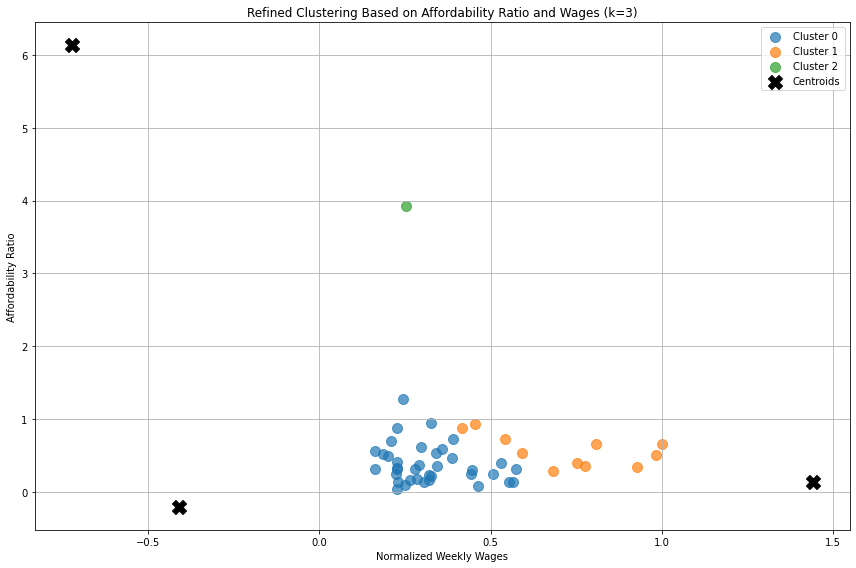

In [11]:
kmeans_refined = KMeans(n_clusters=3, random_state=42)
clusters_refined = kmeans_refined.fit_predict(clustering_data_scaled_clean)

income_wages_data.loc[clustering_data_clean.index, "Cluster"] = clusters_refined

plt.figure(figsize=(12, 8))
for cluster in range(3):
    cluster_data = income_wages_data[income_wages_data["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Normalized_Weekly_Wages"],
        cluster_data["Affordability_Ratio"],
        label=f"Cluster {cluster}",
        s=100, alpha=0.7
    )

centroids_refined = kmeans_refined.cluster_centers_
plt.scatter(
    centroids_refined[:, 1],
    centroids_refined[:, 2],
    color="black", marker="X", s=200, label="Centroids"
)

plt.xlabel("Normalized Weekly Wages")
plt.ylabel("Affordability Ratio")
plt.title("Refined Clustering Based on Affordability Ratio and Wages (k=3)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()